In [1]:
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

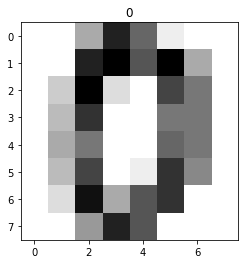

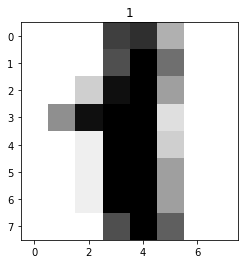

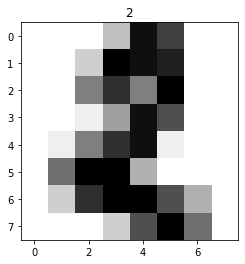

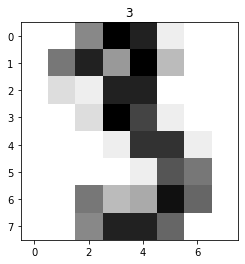

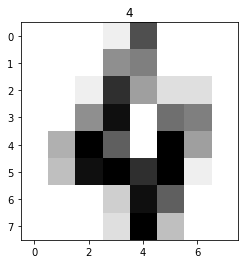

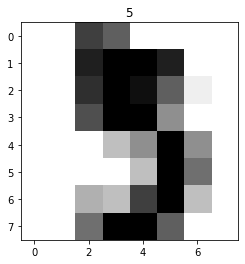

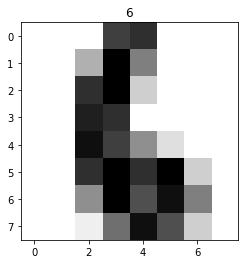

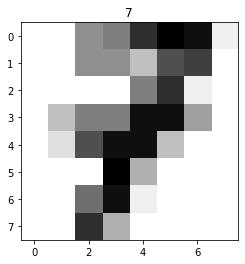

In [4]:
for image, label in list(zip(digits.images, digits.target))[:8]:
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)
    plt.show()

In [7]:
X = pd.DataFrame(digits.data)
y = pd.Series(digits.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

0.7807456872565387


0.8031145717463849

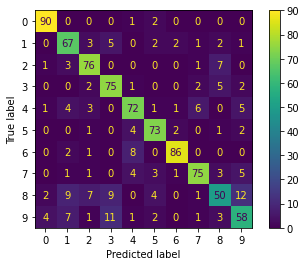

In [9]:
clf = DecisionTreeClassifier(max_depth=9)
print(cross_val_score(clf, X, y, cv=3).mean())

clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test)
clf.score(X_test, y_test)

0.9387868670005565


0.9621802002224694

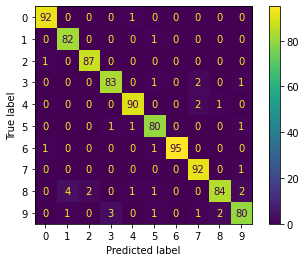

In [16]:
clf = RandomForestClassifier(n_estimators=100, max_depth=9)

print(cross_val_score(clf, X, y, cv=3).mean())
clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test)
clf.score(X_test, y_test)

0.9443516972732331


0.9755283648498332

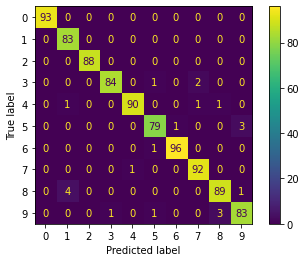

In [17]:
base = DecisionTreeClassifier(max_depth=9)

clf = AdaBoostClassifier(base, n_estimators=100)

print(cross_val_score(clf, X, y, cv=3).mean())

clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test)
clf.score(X_test, y_test)